시작 연도를 입력하세요 : 2001
마지막 연도를 입력하세요 : 2021
기온 변화를 측정할 달을 입력하세요 : 8
2001년부터 2021까지 8월의 기온 변화
8월 최저기온 평균 : 
[23.7, 22.1, 21.7, 22.4, 22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0, 23.2, 22.5, 23.7, 23.7, 24.8, 22.4]
8월 최고기온 평균 : 
[31.4, 28.5, 29.2, 30.7, 31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2, 33.3, 30.5]


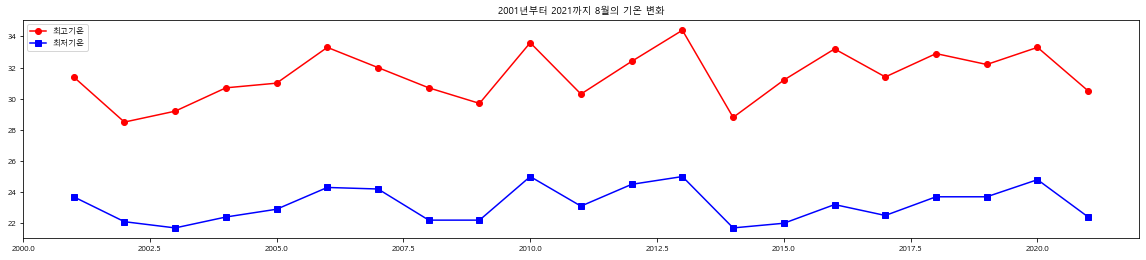

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

df=pd.read_csv('daegu_utf8.csv')
high_temp=[]
low_temp=[]
x_year=[]

def high_low_temp():
    start_year=int(input('시작 연도를 입력하세요 : '))
    last_year=int(input('마지막 연도를 입력하세요 : '))
    month=int(input('기온 변화를 측정할 달을 입력하세요 : '))

    # 날짜 컬럼 자료형 변환
    df['날짜']=pd.to_datetime(df['날짜'])
    df_year=df['날짜'].dt.year
    df_month=df['날짜'].dt.month
    
    # 조건에 맞는 데이터프레임 생성
    cond_df=df[(df_year>=start_year)&(df_year<=last_year)&(df_month==month)]


    for my_year in range(start_year, last_year+1):
        max_temp_mean=round(cond_df[(cond_df['날짜'].dt.year==my_year)]['최고기온'].mean(), 1)
        min_temp_mean=round(cond_df[(cond_df['날짜'].dt.year==my_year)]['최저기온'].mean(), 1)
        high_temp.append(max_temp_mean)
        low_temp.append(min_temp_mean)
        x_year.append(my_year)   # x축 라벨을 위한 리스트
    
    # 그래프 그리기
    plt.figure(figsize=(20,4))
    plt.plot(x_year, high_temp, 'red', marker='o', label='최고기온')
    plt.plot(x_year, low_temp, 'blue', marker='s', label='최저기온')
    
    # 다른 운영체제에서도 적용할 수 있도록 한글 폰트 깨짐 방지
    if platform.system()=='Windows':
        plt.rc('font', family='Malgun Gothic', size=8)
    else:
        plt.rc('font', family='AppleGothic', size=8)
        
    print(f'{start_year}년부터 {last_year}까지 {month}월의 기온 변화')
    print(f'{month}월 최저기온 평균 : \n{low_temp}')
    print(f'{month}월 최고기온 평균 : \n{high_temp}')
    
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus']=False
    plt.title(f'{start_year}년부터 {last_year}까지 {month}월의 기온 변화')
    plt.legend(loc=2)
    plt.show()
    



high_low_temp()